[View in Colaboratory](https://colab.research.google.com/github/mogamin/chainer-examples/blob/master/chainer_utils.ipynb)

In [69]:
# colabでのGPUメモリ,使用率を見る
#!/opt/bin/nvidia-smi

# colabで不要GPUプロセスを削除しメモリを開放する
#!apt install lsof
#!lsof /dev/nvidia*

#!ps f -o user,pgrp,pid,pcpu,pmem,start,time,command -p `lsof -n -w -t /dev/nvidia*`
#!kill -9 4035
!/opt/bin/nvidia-smi

Thu Aug 16 13:45:23 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.111                Driver Version: 384.111                   |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0   148W / 149W |   3714MiB / 11439MiB |    100%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

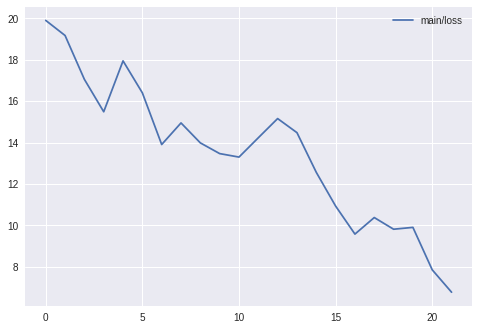

In [72]:
import json
import pandas as pd
with open('result/ssd/log') as f:
  result = pd.DataFrame(json.load(f)).interpolate()

#result[['main/accuracy','val/main/accuracy']].plot()
#result[['main/loss','val/main/loss']].plot()
result[['main/loss']].plot()

#result = result.iloc[11:,:]
#result[['main/accuracy','val/main/accuracy']].plot()
#result[['main/loss','val/main/loss']].plot()

In [3]:
# colabからのファイルダウンロード
!ls -lR result/
#!zip ./result_pattern22.zip -jr result/potato/

#from google.colab import files
#files.download('result_pattern22.zip')

result/:
total 4
drwxr-xr-x 2 root root 4096 Aug 16 02:34 potato

result/potato:
total 4
-rw-r--r-- 1 root root 318 Aug 16 02:34 log


In [0]:
# colabへのファイルアップロード
from google.colab import files
uploaded = files.upload()

In [37]:
from google.colab import files
files.download('model_potato_20180816-134135_gpu.npz')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 40516, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 696, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
# Google Driveとの連携()
import google.colab
import googleapiclient.discovery
import googleapiclient.http

google.colab.auth.authenticate_user()
drive_service = googleapiclient.discovery.build('drive', 'v3')

In [0]:
# Google Driveへの書き出し
filename = 'model_potato_20180816-134135_gpu.npz'
file_metadata = {
  'name': filename,
  'mimeType': 'application/octet-stream'
}
media = googleapiclient.http.MediaFileUpload(filename, 
                        mimetype='application/octet-stream',
                        resumable=True)
created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()